# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_A########.ipynb' (filled in with your student ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted. 
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

## Part 1 - Data Wrangling

You are provided with two data files:
- age_steps.csv
- name_income_id.json

In [441]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [442]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.

sheet = pd.read_csv('/Users/Grant/Assignments/A2/age_steps.csv')
df_steps = pd.DataFrame( sheet, columns = ['id', 'age', 'steps'])
df_steps


,id,age,steps
0,215,54,6276
1,237,48,18999
2,335,63,13102
3,398,54,16028
4,439,45,18621
5,528,63,22166
6,533,39,15258
7,639,55,15891
8,670,52,17403
9,1079,36,15888


In [443]:
assert isinstance(df_steps, pd.DataFrame)


In [444]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.
data = pd.read_json('/Users/Grant/Assignments/A2/name_income_id.json')
df_income = pd.DataFrame(data)
df_income


,first_name,id,income,last_name
0,Jason,22453,13024.21,Adams
1,Paula,49241,61877.51,Adams
2,Louise,39570,48288.61,Alexander
3,Brian,29963,47622.14,Alexander
4,Willie,94698,55014.69,Alexander
5,Jane,83527,7294.28,Alexander
6,Ashley,77974,0.00,Alexander
7,Albert,81933,10307.08,Allen
8,Matthew,41611,50897.85,Allen
9,Brenda,58809,NaN,Allen


In [445]:
assert isinstance(df_income, pd.DataFrame)


In [446]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.
df_income.drop(['first_name','last_name'], axis=1, inplace=True)

In [447]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [448]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Note: For this part, it doesn't in which order you merge the dataframes.

df = pd.merge(df_income, df_steps, on= 'id')
df


,id,income,age,steps
0,22453,13024.21,47,15436
1,49241,61877.51,55,21385
2,39570,48288.61,39,12303
3,29963,47622.14,44,20565
4,94698,55014.69,62,17405
5,83527,7294.28,60,7521
6,77974,0.00,55,17369
7,81933,10307.08,54,20557
8,41611,50897.85,77,13831
9,58809,NaN,63,12866


In [449]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [450]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]
df = df[['id','age','steps','income']]
df

,id,age,steps,income
0,22453,47,15436,13024.21
1,49241,55,21385,61877.51
2,39570,39,12303,48288.61
3,29963,44,20565,47622.14
4,94698,62,17405,55014.69
5,83527,60,7521,7294.28
6,77974,55,17369,0.00
7,81933,54,20557,10307.08
8,41611,77,13831,50897.85
9,58809,63,12866,NaN


In [451]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

## Part 2 - Data Cleaning

In [452]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'

n_nan = np.count_nonzero(np.isnan(df['income']))
print(n_nan)

12


In [453]:
assert(n_nan)

In [454]:
# 2b) Remove all rows from df that have missing data (that have NaN values)

df = df.dropna()
df


,id,age,steps,income
0,22453,47,15436,13024.21
1,49241,55,21385,61877.51
2,39570,39,12303,48288.61
3,29963,44,20565,47622.14
4,94698,62,17405,55014.69
5,83527,60,7521,7294.28
6,77974,55,17369,0.00
7,81933,54,20557,10307.08
8,41611,77,13831,50897.85
10,60011,39,19785,18448.03


In [455]:
assert(sum(np.isnan(df['income'])) == 0)

## Data Visualization

- You will be making histograms, check out this example on how to do that.
    - http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
    - This example has more than you need: 
        - Titles, axis labels, etc are optional (but recommended)
        - You do no need to add a 'best fit' line.
- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

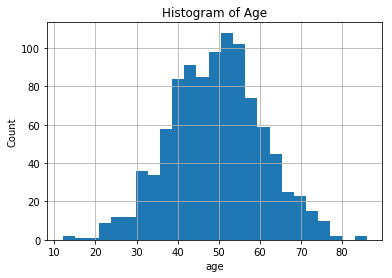

In [456]:
# 2c) Plot the histogram of the age variable

plt.hist(df['age'], 25)
plt.xlabel('age')
plt.ylabel('Count')
plt.title(r'Histogram of Age')

plt.grid(True)

f1 = plt.gcf()

In [457]:
assert f1.gca().has_data()

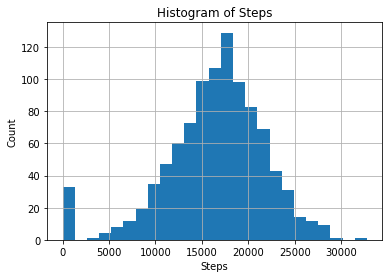

In [458]:
# 2d) Plot the histogram of the steps variable



plt.hist(df['steps'],25)
plt.xlabel('Steps')
plt.ylabel('Count')
plt.title(r'Histogram of Steps')

plt.grid(True)

f2 = plt.gcf()

In [459]:
assert f2.gca().has_data()

### M1 - What do you notice about steps data from the plot?

The steps data is relatively normal, but there are a lot fo outliers who didn't take any steps. 

In [460]:
# 2e) Check how many -1 values there are in steps. Save the number into a variable called 'n_neg'

value_list = [-1]
n_neg = df[df.steps.isin(value_list)].count().steps
n_neg

33

In [461]:
assert(n_neg)


In [462]:
# 2f) Remove all rows where steps is equal to -1


df = df[df['steps']> -1]
df

,id,age,steps,income
0,22453,47,15436,13024.21
1,49241,55,21385,61877.51
2,39570,39,12303,48288.61
3,29963,44,20565,47622.14
4,94698,62,17405,55014.69
5,83527,60,7521,7294.28
6,77974,55,17369,0.00
7,81933,54,20557,10307.08
8,41611,77,13831,50897.85
10,60011,39,19785,18448.03


In [463]:
assert -1 not in df['steps']

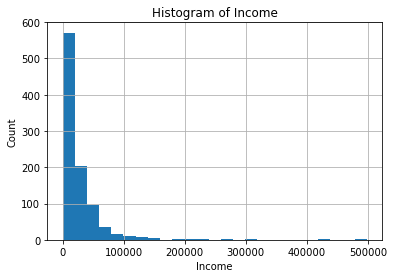

In [464]:
# 2g) Plot the histogram of the income variable
plt.hist(df['income'], 25)


plt.xlabel('Income')
plt.ylabel('Count')
plt.title(r'Histogram of Income')

plt.grid(True)

f3 = plt.gcf()

In [465]:
assert f3.gca().has_data()


### M2 - What do you notice about the income data from the plot?

It is skewed right. The wealth distribution shows there are a lot of people who make little and few who make a lot.

In [466]:
# 2h) For all rows in which income is equal to zero, recode income to be equal to 1



df.loc[df['income']==0, 'income'] =1
df



/Users/Grant/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,age,steps,income
0,22453,47,15436,13024.21
1,49241,55,21385,61877.51
2,39570,39,12303,48288.61
3,29963,44,20565,47622.14
4,94698,62,17405,55014.69
5,83527,60,7521,7294.28
6,77974,55,17369,1.00
7,81933,54,20557,10307.08
8,41611,77,13831,50897.85
10,60011,39,19785,18448.03


In [467]:
assert sum(df['income'] == 0.) == 0

In [468]:
# 2i) Transform income using a log10 transform
df['income']=np.log10(df['income'])


/Users/Grant/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [469]:
assert np.isclose(min(df['income']), 0.0, 0.1)
assert np.isclose(max(df['income']), 5.69, 0.1)


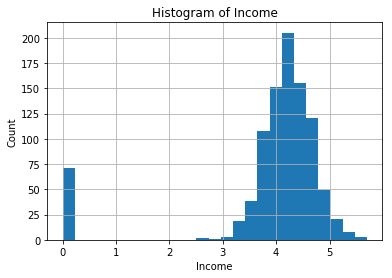

In [470]:
# 2j) Replot the histogram for income data after the data transformation
plt.hist(df['income'], 25)


plt.xlabel('Income')
plt.ylabel('Count')
plt.title(r'Histogram of Income')
plt.grid(True)
df = df[df['income'] > 0]
f4 = plt.gcf()

In [471]:
assert f4.gca().has_data()

### M3 - What do you notice about the income data after you replot it?

It becomes normally distributed with a few outliers at 0

In [472]:
# 2k) Remove all rows where age is less than 18
df = df[df['age']>= 18]
df

,id,age,steps,income
0,22453,47,15436,4.114751
1,49241,55,21385,4.791533
2,39570,39,12303,4.683845
3,29963,44,20565,4.677809
4,94698,62,17405,4.740479
5,83527,60,7521,3.862982
7,81933,54,20557,4.013136
8,41611,77,13831,4.706699
10,60011,39,19785,4.265950
12,7866,30,28311,4.068325


In [473]:
assert min(df['age']) >= 18

### Removing outliers
Next, we're going to remove all rows where the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

In [474]:
# 2l) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

std3 = (df['steps'].std())*3
avg = df['steps'].mean()
std_max = avg+std3
std_min = avg-std3

In [475]:
assert(std3)
assert(std_min)
assert(std_max)


In [476]:
# 2m) Now use these values to remove any rows with steps data above or below these thresholds

df=df.drop(df[(df['steps'] > std_max)].index)
df=df.drop(df[(df['steps'] < std_min)].index)

In [477]:
assert min(df['steps']) > 3446
assert max(df['steps']) < 30594

In [478]:
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (879, 4)

## Part 3 - Basic Analyses

In [479]:
# 3a) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas function. Keep all columns (including ID).

corrs = df.corr()


In [480]:
assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

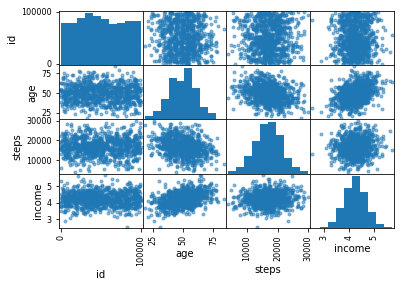

In [481]:
# 3b) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
fd = pd.scatter_matrix(df[['id','age', 'steps','income']])

In [482]:
fd[0][0].axes.has_data()

True

# Part 4 - Predictions

Notes:
- Use the polyfit function from np, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions should be in dollars (so you'll have to 'un-log' the prediction)

In [499]:
# 4a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'
a1, b1 = np.polyfit(df['age'], df['income'],1)



In [484]:
assert(a1)
assert(b1)


In [500]:
# 4b) Use the model parameters from 4a to predict the income of a 75 year old. Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
pred1 = np.power(10,75*a1+b1)
pred1


42811.254984029983

In [486]:
assert(pred1)


In [501]:
# 4c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'
a2, b2 = np.polyfit(df['steps'], df['income'], 1)


In [502]:
assert(a2)
assert(b2)


In [496]:
# 4d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
pred2 = a2*20000 + b2
pred2 = np.power(10,pred2)
pred2

18488.891361660524

In [503]:
assert(pred2)


In [518]:
# 4e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.
better_model = "age"

In [519]:
assert better_model

### M4 - Why do you think (whichever model you answered) is better?

I think the age model is better because based on the prediction I did, the age data point was situated in the middle of the data more than for the steps prediction.

## Done! Upload this notebook to TritonED